# Übung 3 - Merkmalsextraktion 

**Name:** Faiz Akbar Daud, **Matr.-Nr.:** 552351
<br>
**Name:** Hatem Al-tayi, **Matr.-Nr.:** 557187

---

## Bearbeitungszeitraum

**Bearbeitungsbegin:** Mo, 19.12.2019
<br>
**Abgabe:** So, 30.01.2020, 23:55 Uhr

---

## Aufgabenbeschreibung

Das Ziel dieser Übung ist es, den prinzipiellen Ablauf einer Bildanalyse (inkl. einzelne Teilschritte) auf ein Bild aunzuwenden und somit auch den Zusammenhang einzelner Operationen besser nachzuvollziehen.

![AblaufBildanalyse](AblaufBildanalyse.png)




### Generelle Hinweise zur Bearbeitung: 

Die Herausforderung hierbei ist, dass mehrere Phasen der Bildverarbeitung aufeinander aufbauend umgesetzt werden müssen. Zudem ist die Planung sowie die Durchführung des Lösungsweges (ohne konkrete Vorgaben) Ihnen überlassen. Jedoch sollten Sie folgende allgemeine und hilfreiche "Werkzeuge" ins Betracht ziehen:

**Phasen der Bildverarbeitung:**
1.	Bild öffnen
2.	Bildvorverarbeitung
3.	Segmentierung
4.	Objekterkennung
5.	Analyse
6.	Visualisierung

**Zur Segmentierung:**
1.	Iterative Berechnung des optimalen Schwellenwertes
2.	Histogrammanalyse für multimodale Histogramme

**Zur Objekterkennung**
1.	Algorithmus zur Detektion von Kreisen
2.	Hough-Transformation
3.	Skelettierung



### Hinweise zur Abgabe und zur Benotung

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Ergänzen Sie den Dateinamen des Notebooks vor der Abgabe um `_` und Ihre Matr.-Nr. (`Uebung 1 - Biosignale_s0500000_s0500001.ipynb`).
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Bilddatei muss nicht abgegeben werden.
- Die Aufgabe wird nach dem üblichen Notenschema von 1,0 bis 5,0 bewertet.
- Diese Aufgabe wird mit 40% in der Gesamtnote der Übung gewichtet.

### Viel Erfolg!

## Aufgabenbeschreibung

Lesen Sie `roentgen.tif` mit Hilfe der `matplotlib`-Bibliothek ein. Visualisieren Sie das, in der Datei enthaltene Bild (verwenden Sie die Funktionen `imshow` und `show`).

1.	Berechnen Sie die Anzahl der Finger im Bild.
2.	Finden Sie die Knochen und die Hand. Berechnen Sie dazu den Anteil der Knochen an der Gesamtfläche der Hand.
3.	Berechnen Sie die Anzahl gesamten (einzelnen) Knochen.
 
**Bonus:** 
4. Berechnen Sie die zusätzlich zur Anzahl auch die maximale Länge jedes Knochens.

### Achtung:

1. Die Lösung soll gelten für:
    - beliebig große Bilder (Zeilen- und Spaltenanzahl)
    - andere Bilder als das Testbild (z.B. `Testbild_Roentgen2.jpg`), jedoch in demselben Bildtyp (Grau- oder Farbbild) und mit derselben Art von Objekten
    - Objekte an beliebiger Stelle im Bild (auch Objekte an Rändern und Ecken können vorkommen!). „Unvollständige“ Objekte müssen allerdings nicht berücksichtigt werden. Also berücksichtigen Sie bitte, anders als in den Übungen, auch die Sonderfälle. 
    

2. Der Quellcode wird für die Benotung auch an anderen Bildern als diesen Testbildern getestet!


3. Bewertet werden:
    - Das Ergebnis (Anzahl gefundener Objekte, Ergebnis der Analysen, etc.)
    - Der Lösungsweg (Programmaufbau, Geschwindigkeit, benutzte Algorithmen)
    - Fehlerresistenz und Allgemeingültigkeit (Test mit anderen Bildern)


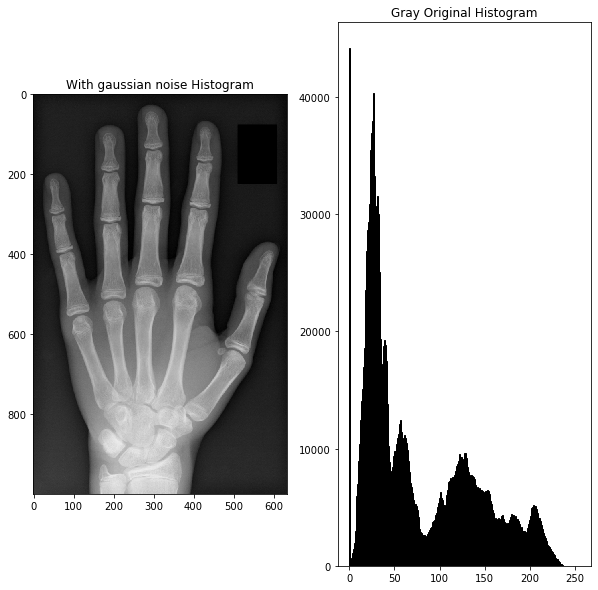

In [5]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2

#Das Bild wird eingelesen und ausgegeben
img = cv2.imread('roentgen.tif')
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 2), plt.hist(img.ravel(), bins=256, range=(0,255), fc='k', ec='k')
plt.title("Gray Original Histogram")
plt.subplot(1, 2,1), plt.imshow(img)
plt.title("With gaussian noise Histogram")
plt.show()


<Figure size 576x576 with 0 Axes>

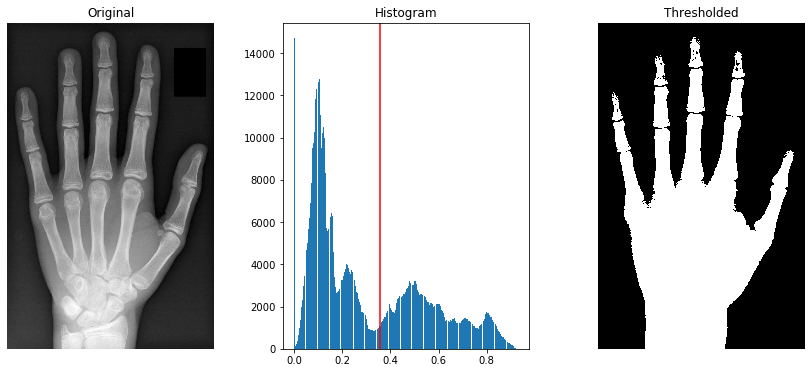

In [6]:
from skimage.filters import threshold_otsu
from skimage import io

img = io.imread('roentgen.tif', as_gray=True)
thresh = threshold_otsu(img)
binary = img > thresh

plt.figure(figsize=(8,8))

fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(img.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

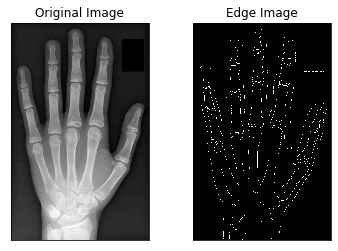

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('roentgen.tif',0)
edges = cv2.Canny(img,100,100)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

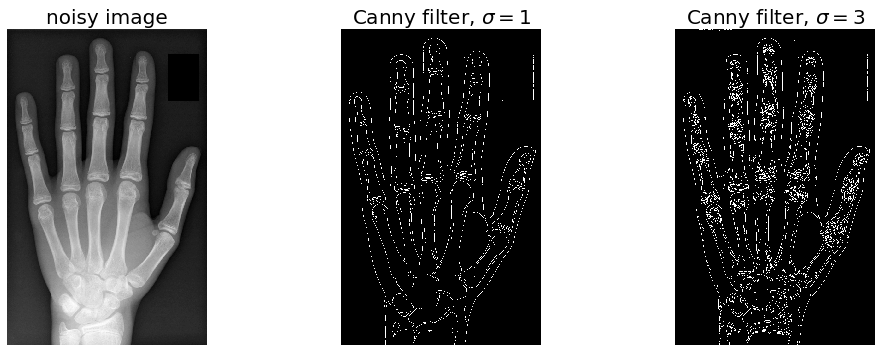

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import skimage as ski
from skimage import feature


# Generate noisy image of a square
img=cv2.imread('roentgen.tif',0)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(img)
edges2 = feature.canny(img, sigma=0.4)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),
                                    sharex=True, sharey=True)

ax1.imshow(img, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [25]:
import cv2
from io import BytesIO
from IPython.display import Image
from ipywidgets import interact, fixed
import matplotlib as mpl
from skimage import data, filters, io

# Hilfsfunktion zur Konvertierung eines Numpy-Arrays in ein 'Image'-Objekt

def arr2img(arr):
    if arr.ndim == 2:
        format, cmap = 'png', mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = 'jpg', None
    else:
        raise ValueError("Only 2- or 3-d arrays can be displayed as images.")
    vmax = 255 if arr.dtype == 'uint8' else 1.0
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, format=format, cmap=cmap, vmin=0, vmax=vmax)
        out = buffer.getvalue()
    return Image(out)

def edit_image(image, Threshold=127):
    ret, gray = cv2.threshold(image,Threshold,255,cv2.THRESH_BINARY)
    return arr2img(gray)

# Interaktiv wäre doch viel besser !!!
from IPython.display import display
import ipywidgets as widgets

img = cv2.imread("roentgen.tif",0)
# Parameter-Grenzen, wobei die Änderung des Parameters nur
# bei mouse release events an die Funktion übergeben werden.
# Sinnvoll bei Funktionen mit langer Laufzeit! (hier nur als Beispiel)
thresh_limit = widgets.FloatSlider(value=127, min=0, max=255, step=1, continuous_update=True)

# Interaktives Widget initialisieren und ausführen
# image=fixed(img) - der Parameter image der Funktion edit_image soll nicht verändert werden

interact(edit_image, image=fixed(img), Threshold=thresh_limit);

interactive(children=(FloatSlider(value=127.0, description='Threshold', max=255.0, step=1.0), Output()), _dom_…

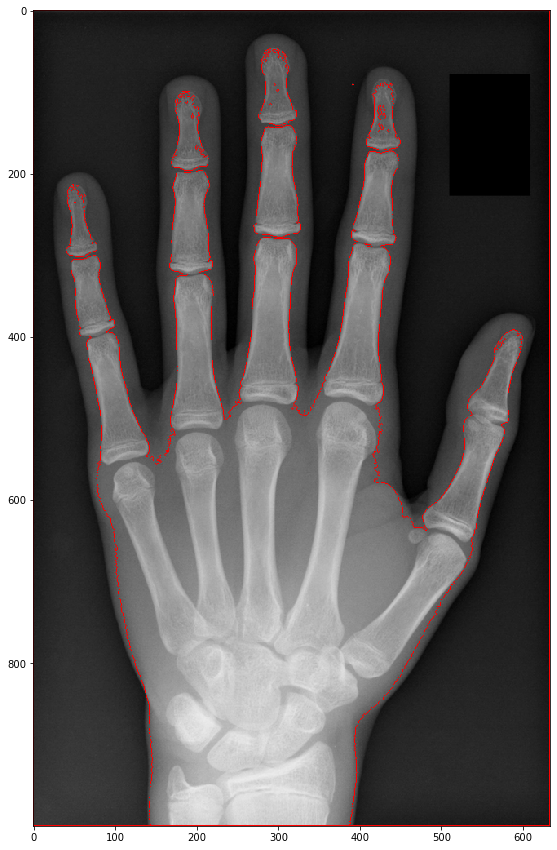

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('roentgen.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((1,1),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations =1)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=10)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,0)
ret, sure_fg = cv2.threshold(dist_transform,0.005*dist_transform.max(),2,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

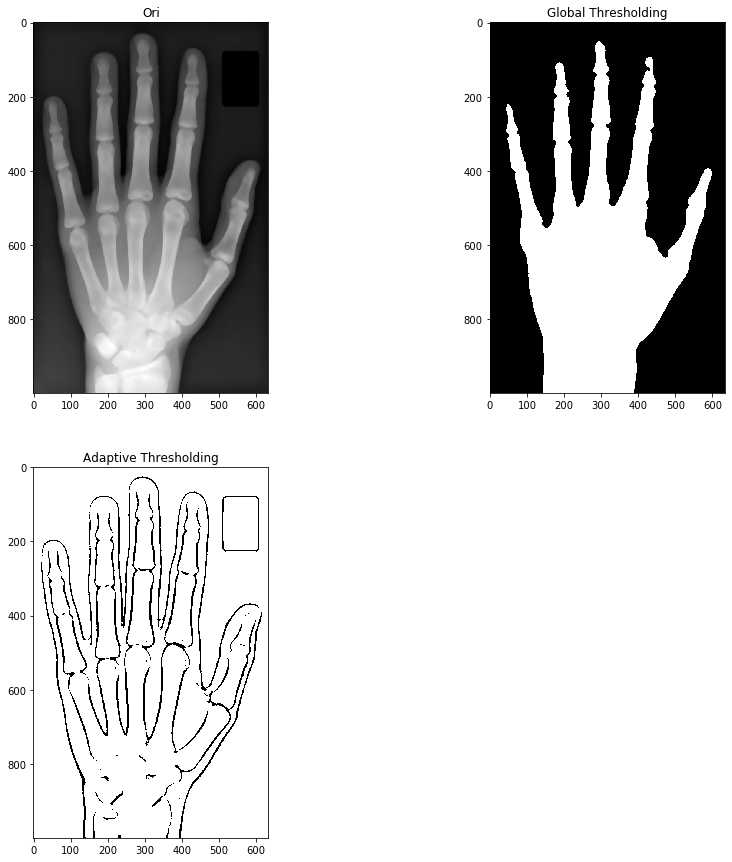

In [13]:
from skimage.filters import threshold_otsu, threshold_local


img = cv2.imread('roentgen.tif',0)
img = cv.medianBlur(img,13)
#img0 = cv2.imread('roentgen.tif')
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#ret, img = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
global_thresh = threshold_otsu(img)
binary_global = img > global_thresh

block_size = 25
adaptive_thresh = threshold_local(img, block_size, offset=5)
binary_adaptive = img > adaptive_thresh



plt.figure(figsize=(15,15))
plt.subplot(2, 2,1), plt.imshow(img, cmap='gray')
plt.title("Ori")
plt.subplot(2, 2,2),plt.imshow(binary_global, cmap='gray')
plt.title("Global Thresholding")
plt.subplot(2, 2,3), plt.imshow(binary_adaptive, cmap='gray')
plt.title('Adaptive Thresholding')
thc =binary_adaptive
plt.show()

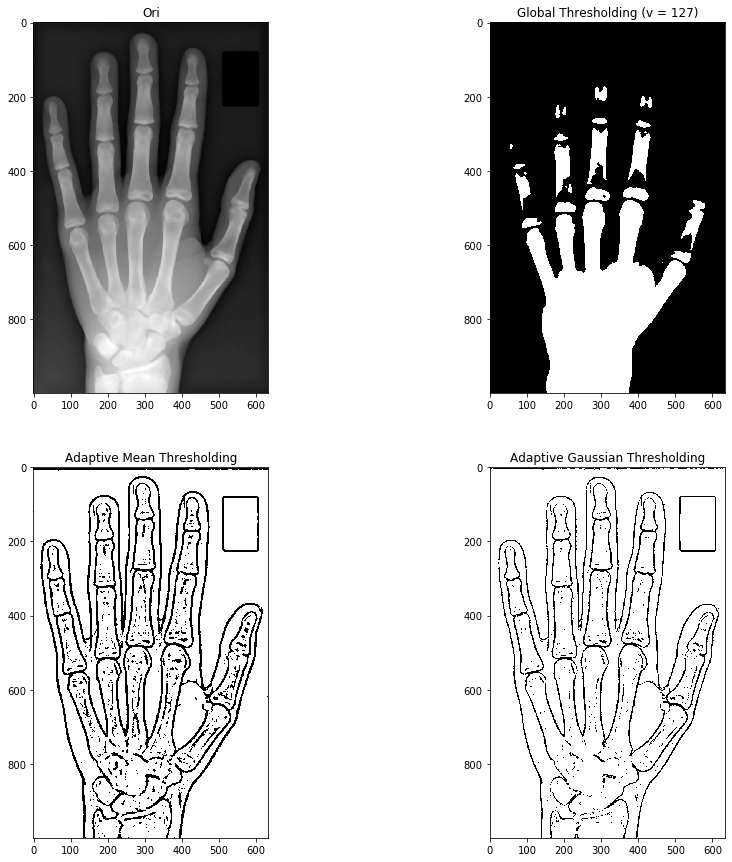

In [259]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('roentgen.tif',0)
img = cv.medianBlur(img,9)
ret,th1 = cv.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title("Ori")
plt.subplot(2, 2, 2),plt.imshow(th1, cmap='gray')
plt.title("Global Thresholding (v = 127)")
plt.subplot(2, 2,3), plt.imshow(th2, cmap='gray')
plt.title('Adaptive Mean Thresholding')
plt.subplot(2, 2,4),plt.imshow(th3, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.show()

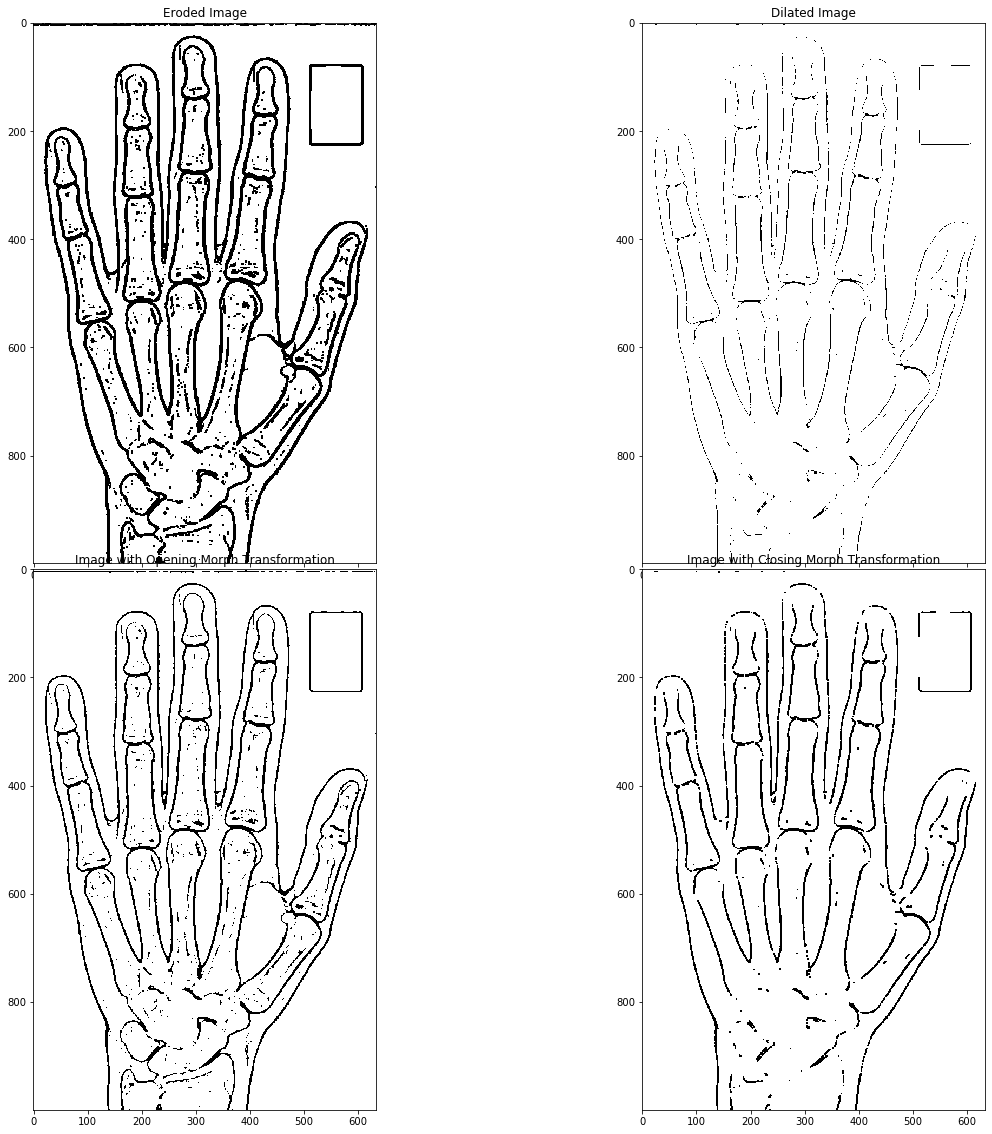

In [260]:
image = th3

# Hier werden alle Pixel in der Nähe der Grenze, abhängig von der Größe des Kernels und je nach 
# Morphologischem Operator zB verwerfen.
kernel = np.ones((3,3), np.uint8)

# Hier werden die verschiedenen Morphologischen Operatoren aufgeführt
# Achtung bei cv2 werden die Kernel auf die weißen Pixel angewendet (Dilatation wird dadurch kleiner statt größer)
image_erosion = cv2.erode(image,kernel,iterations=1)
image_dilation = cv2.dilate(image,kernel,iterations=1)
image_opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
image_closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(20,20))

plt.subplot(2, 2,1),plt.imshow(image_erosion, cmap='gray')
plt.title("Eroded Image")
plt.subplot(2, 2,2),plt.imshow(image_dilation, cmap='gray')
plt.title("Dilated Image")
plt.subplot(2, 2,3),plt.imshow(image_opening, cmap='gray')
plt.title("Image with Opening Morph Transformation")
plt.subplot(2, 2,4),plt.imshow(image_closing, cmap='gray')
plt.title("Image with Closing Morph Transformation")

plt.subplots_adjust(hspace=0.01)
plt.show()

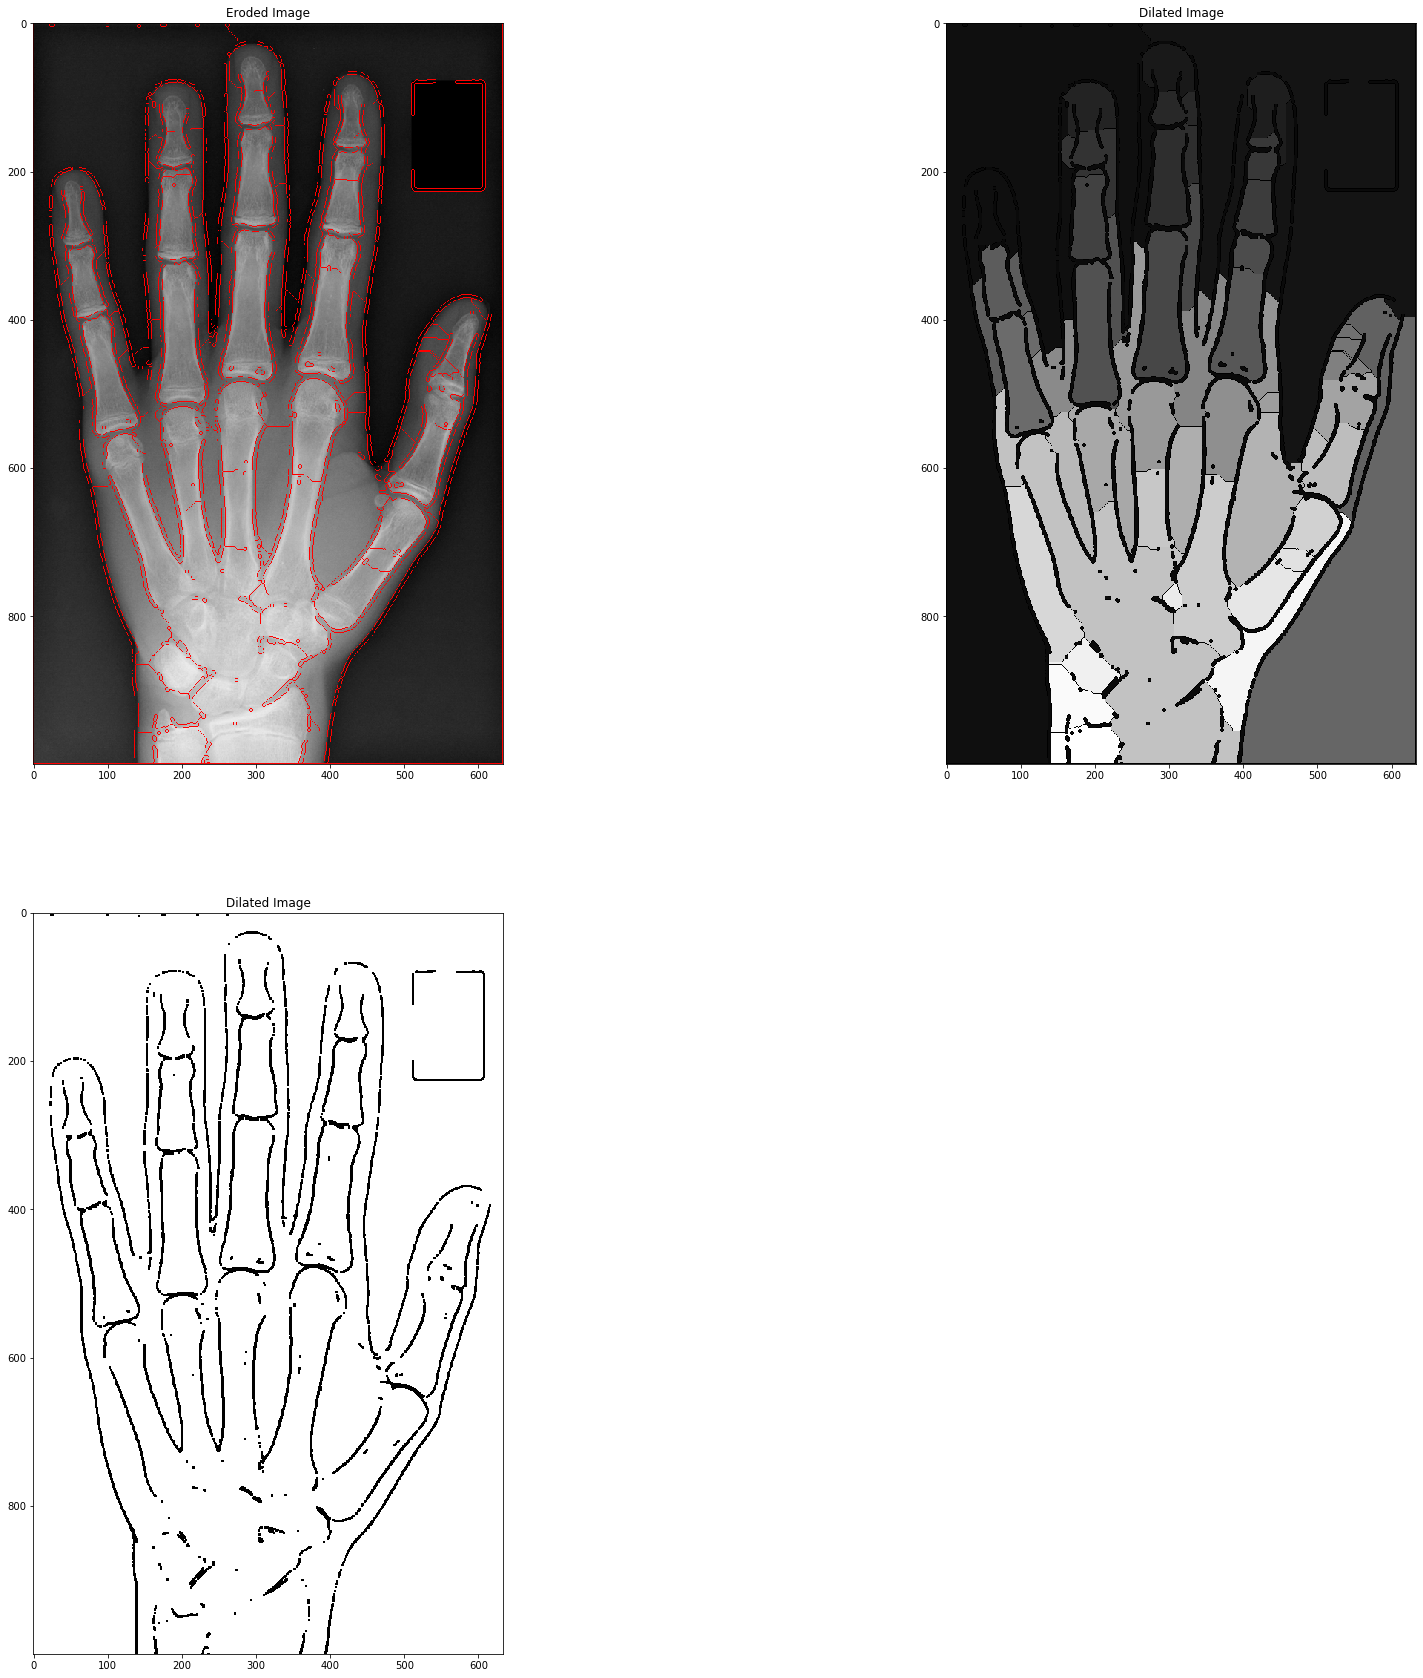

In [283]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('roentgen.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th3=image_closing
thresh= th3

# noise removal
kernel = np.ones((1,1),np.uint8)
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel,iterations=1)

# sure background area
sure_bg = cv2.dilate(thresh,kernel,iterations = 1)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,0)
ret, sure_fg = cv2.threshold(dist_transform,0.07*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
imgg= cv2.cvtColor(th3, cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(imgg,markers)
img[markers == -1] = [255,0,0]
plt.figure(figsize=(30,30))
plt.subplot(2, 2,1),plt.imshow(img)
plt.title("Eroded Image")
plt.subplot(2, 2,2),plt.imshow(markers, cmap='gray')
plt.title("Dilated Image")
plt.subplot(2, 2,3),plt.imshow(imgg)
plt.title("Dilated Image")

plt.show()

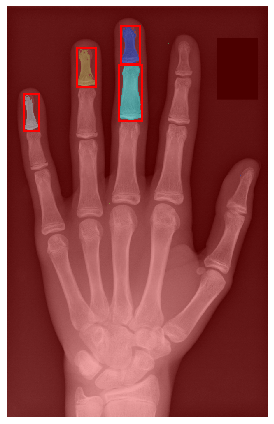

In [281]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = cv2.imread('roentgen.tif',0)
thresh= threshold_otsu(image)

bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 10:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

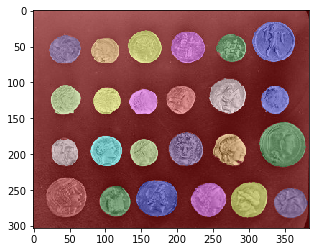

In [264]:
from skimage import data
from skimage.exposure import histogram
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.filters import sobel
from skimage.morphology import watershed

coins = data.coins()
hist, hist_centers = histogram(coins)

edges = canny(coins/255.)

fill_coins = ndi.binary_fill_holes(edges)

label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
coins_cleaned = mask_sizes[label_objects]

markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

elevation_map = sobel(coins)

markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2



segmentation = watershed(elevation_map, markers)

segmentation = ndi.binary_fill_holes(segmentation - 1)

labeled_coins, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=coins)

plt.imshow(image_label_overlay)




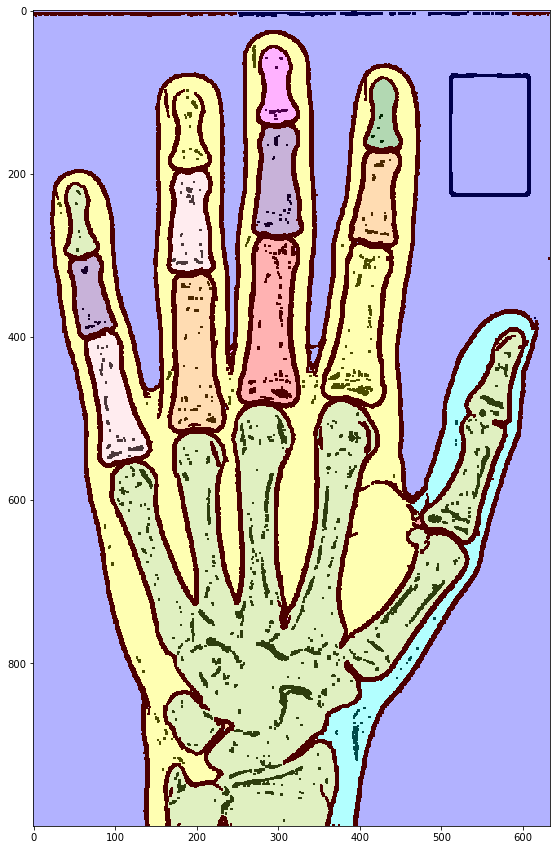

In [307]:
from skimage import data
from skimage.exposure import histogram
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.filters import sobel
from skimage.morphology import watershed
from skimage import feature

coins = image_erosion

edges = feature.canny(coins)

fill_coins = ndi.binary_fill_holes(edges)

label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 2000
mask_sizes[0] = 0
coins_cleaned = mask_sizes[label_objects]

markers = np.zeros_like(coins)

elevation_map = sobel(coins)

markers = np.zeros_like(coins)
markers[coins < 100] = 1
markers[coins > 150 ] = 2
#markers[coins > 130] = 3

segmentation = watershed(elevation_map, markers)

segmentation = ndi.binary_fill_holes(segmentation-1)

labeled_coins, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=coins)

plt.figure(figsize=(15,15))
plt.imshow(image_label_overlay)


In [306]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = image_label_overlay


# remove artifacts connected to image border
cleared = clear_border(image)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 10:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

ValueError: `image` and `label` must be the same shape

In [270]:
markers[coins < 90] = 1
markers[coins > 155] = 2